# Census EDA


Notes about the census data:
- 2000, 2010: Seems to have less zip codes than the 2011+ data. 2000 has less zip codes than 2010. 
- 2001 - 2009: I don't have population counts by year by zip for these years. I've linear interpolated the population counts for these years between 2000 and 2010. If the zip code was missing in 2000 but present in 2010, I've held the 2010 population constant for 2001-2009. If the zip code was present in 2000 and missing in 2010, I've held the population constant for 2001-2009.
- 2011-2020: The ACS is a survey that estimates the population by year by zip. It uses a 5-year rolling average of the estimates to estimate the population for a given year/zip combo. 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import os
import re 
from datetime import datetime

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
data_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210 Capstone/Data/census/census_bureau_clean'
#os.chdir(data_path)
os.listdir(data_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['census_bureau.csv']

In [ ]:
df = pd.read_csv(os.path.join(data_path, 'census_bureau.csv'))
df = df.sort_values(['year', 'zip']).reset_index(drop=True)
df

,year,zip,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,total_pop_under19
0,2000,89010,345.00000,188.00000,157.00000,11.00000,7.00000,4.00000,22.00000,16.00000,6.00000,24.00000,10.00000,14.00000,24.00000,18.00000,6.00000,81.00000
1,2000,89019,2478.00000,1338.00000,1140.00000,105.00000,43.00000,62.00000,153.00000,79.00000,74.00000,152.00000,67.00000,85.00000,120.00000,58.00000,62.00000,530.00000
2,2000,89060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,89061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,89439,1215.00000,623.00000,592.00000,29.00000,15.00000,14.00000,47.00000,24.00000,23.00000,79.00000,40.00000,39.00000,74.00000,30.00000,44.00000,229.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37144,2020,96148,679.00000,349.00000,330.00000,20.00000,20.00000,0.00000,36.00000,12.00000,24.00000,35.00000,11.00000,24.00000,0.00000,0.00000,0.00000,91.00000
37145,2020,96150,30369.00000,15865.00000,14504.00000,1362.00000,672.00000,690.00000,1172.00000,472.00000,700.00000,1364.00000,738.00000,626.00000,1621.00000,871.00000,750.00000,5519.00000
37146,2020,96155,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
37147,2020,96161,18782.00000,9504.00000,9278.00000,1045.00000,458.00000,587.00000,1188.00000,617.00000,571.00000,1315.00000,661.00000,654.00000,788.00000,298.00000,490.00000,4336.00000


Every year has the same count of zip codes, but some have population counts that are NA. 

In [ ]:
df[df['total_population'].notnull()]['year'].value_counts()

2020    1769
2001    1769
2017    1769
2016    1769
2015    1769
2014    1769
2013    1769
2012    1769
2011    1769
2009    1769
2019    1769
2008    1769
2007    1769
2006    1769
2005    1769
2004    1769
2003    1769
2002    1769
2018    1769
2010    1768
2000    1658
Name: year, dtype: int64

Years 2001-2020 have the same zip codes. But 2000 is missing 112 zips. 

In [ ]:
df[df['total_population'].notnull()]['zip'].value_counts().to_frame().value_counts()

zip
21     1657
20      112
dtype: int64

Plotting a time series of every single zip code is just too messy to see anything useful

In [ ]:
all_zips = list(set(df.zip))

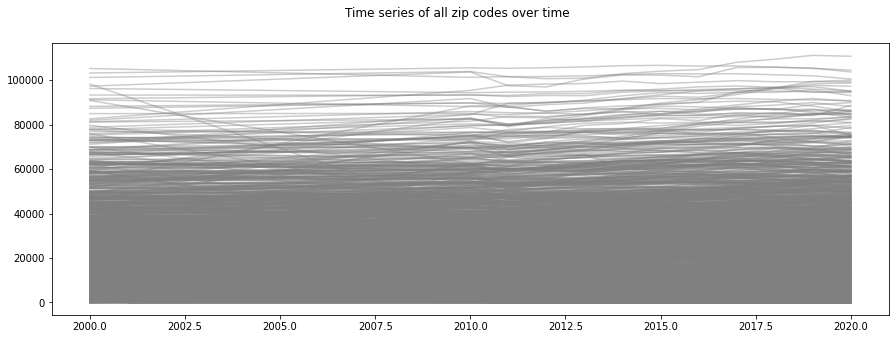

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

for zip_i in all_zips:
  df1 = df[(df.zip == zip_i)] # & (df.total_population < 2000) # filter diff pop ranges
  ax.plot(df1.year, df1.total_population, 'grey', alpha=.4)
  #ax.set_yscale('log')

fig.suptitle('Time series of all zip codes over time')
print('')

Look at just the zip codes that are missing from 2000. The mean overall population in those zip codes is much smaller than the other zip codes. Thus, it's definitely the smaller population zip codes that are missing from 2000. 

In [ ]:
zips_2000 = df[(df.year == 2000) & (df.total_population.notnull())]['zip'].to_list()
df_no_2000 = df[df['zip'].map(lambda x: x not in zips_2000)]
df_yes_2000 = df[df['zip'].isin(zips_2000)]

# agg_dict = {i:(i, 'mean') for i in df2.columns[2:len(df2.columns)-1]}
# df2.groupby('year').agg(**agg_dict)

x1 = df_no_2000['total_population'].mean()
x2 = df_yes_2000['total_population'].mean()

print('Avg pop not in 2000 zip codes: {:.0f}'.format(x1))
print('Avg pop in 2000 zip codes: {:.0f}'.format(x2))

Avg pop not in 2000 zip codes: 8088
Avg pop in 2000 zip codes: 21861


Median zip population over time
- 2000 is really high for some because some of the smaller zips aren't included. 

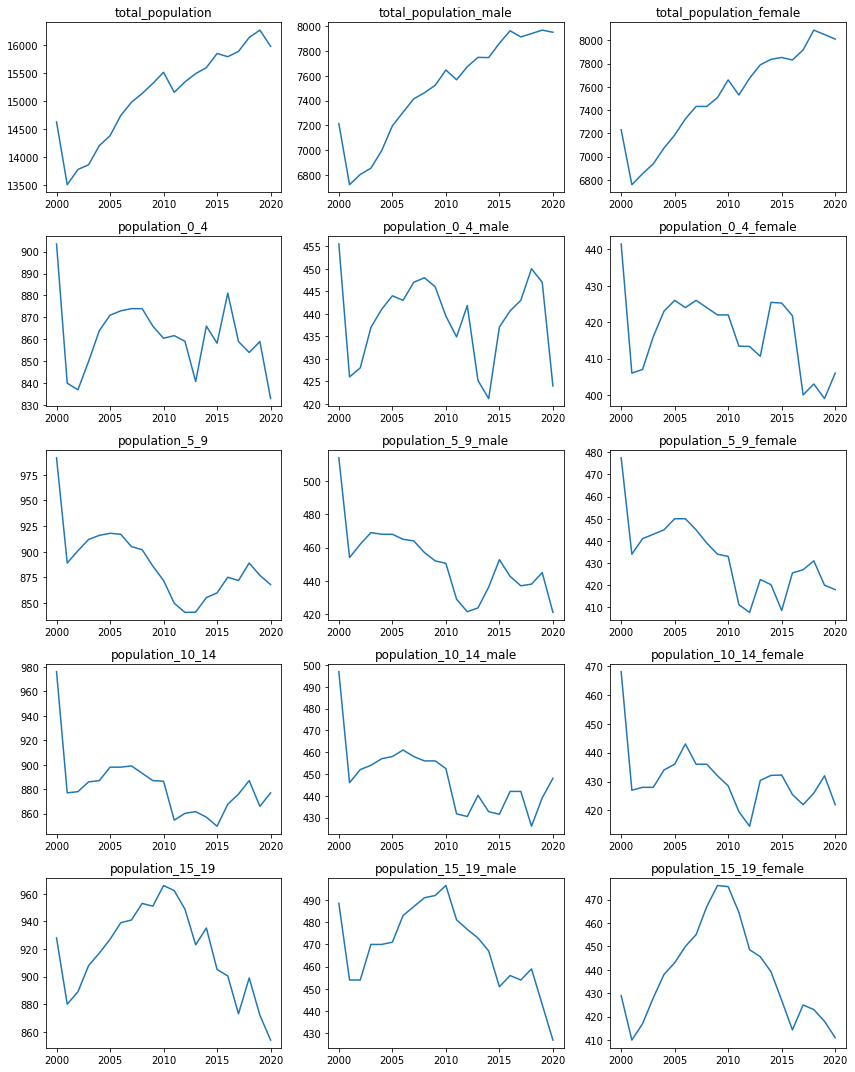

In [ ]:
agg_dict = {i:(i, 'median') for i in df.columns[2:len(df.columns)-1]}
# agg_dict['n']= ('year', 'count')
df_plt = df.groupby('year').agg(**agg_dict).reset_index()

# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

# fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print('')

Mean Populations

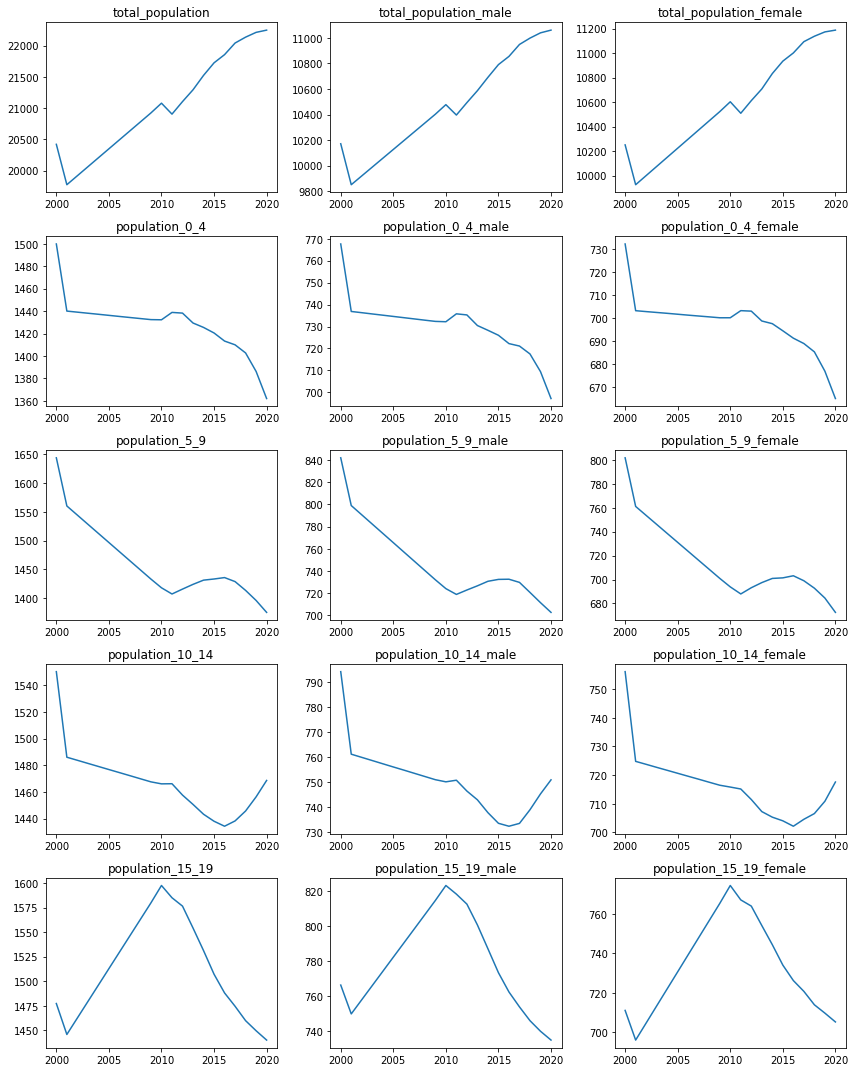

In [ ]:
agg_dict = {i:(i, 'mean') for i in df.columns[2:len(df.columns)-1]}
# agg_dict['n']= ('year', 'count')
df_plt = df.groupby('year').agg(**agg_dict).reset_index()

# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

# fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print('')

Sum of populations over time

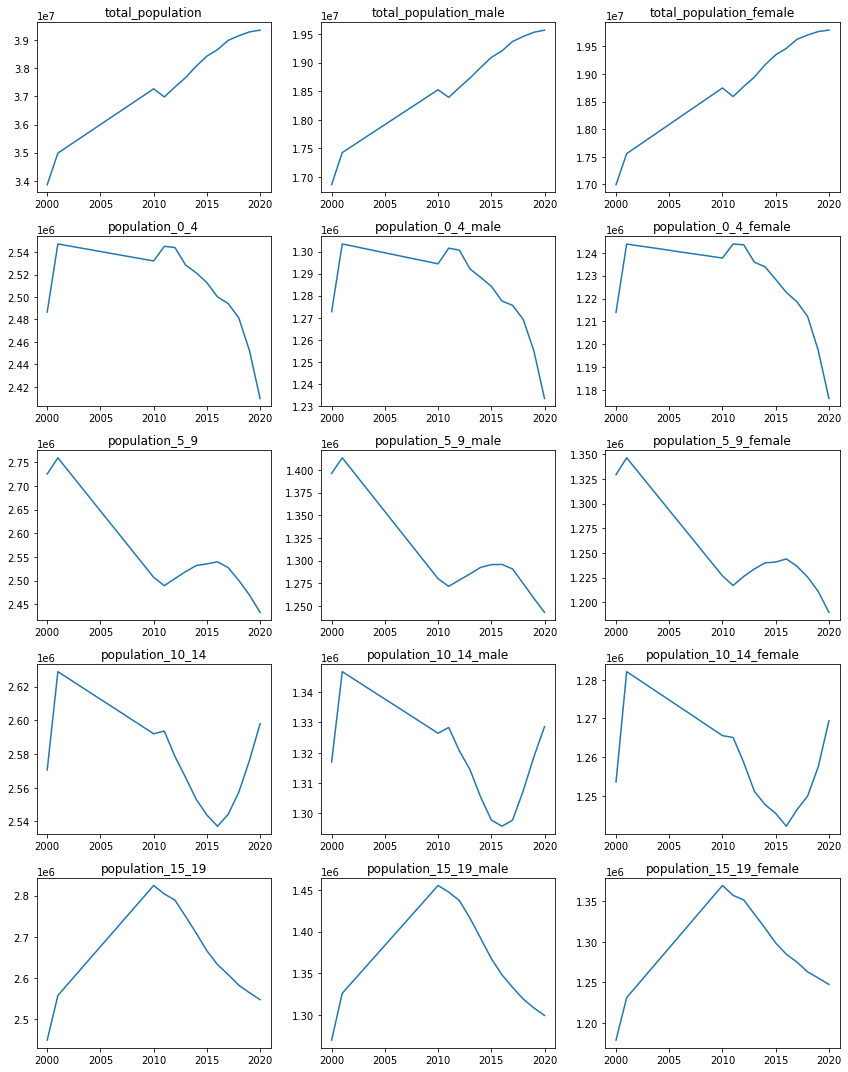

In [ ]:
agg_dict = {i:(i, 'sum') for i in df.columns[2:len(df.columns)-1]}
# agg_dict['n']= ('year', 'count')
df_plt = df.groupby('year').agg(**agg_dict).reset_index()

# scatter plots of all num vars w/ response var
num_rows = 5
num_cols = 3

all_vars = df_plt.columns[1:]

fig, ax = plt.subplots(num_rows, num_cols, figsize = (12, 15))

col_i = 0
for i in range(num_rows):
  for j in range(num_cols):
    var = all_vars[col_i]
    ax[i][j].plot(df_plt['year'], df_plt[var])
    
    ax[i][j].set_title(var)
    col_i += 1

# fig.suptitle("Population over Time".format(col_i), size=15)
fig.tight_layout()
print('')

Look at just the population \<19 over time

In [ ]:
df['male_0_19'] = df['population_0_4_male'] + df['population_5_9_male'] + df['population_10_14_male'] + df['population_15_19_male']
df['female_0_19'] = df['population_0_4_female'] + df['population_5_9_female'] + df['population_10_14_female'] + df['population_15_19_female']
df = df.rename(columns={'total_pop_under19': 'total_0_19'})

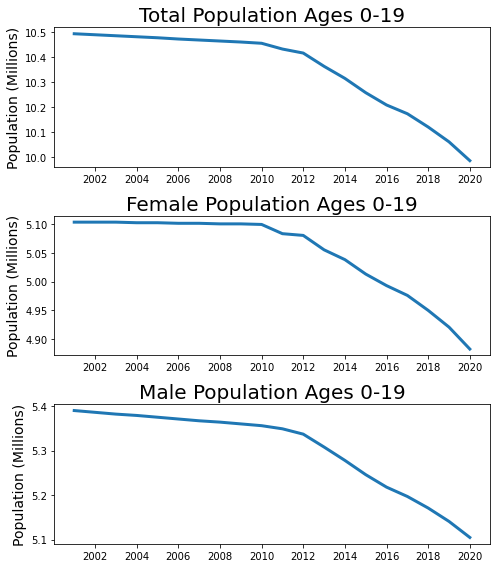

In [ ]:
# import matplotlib.style as mat_style
# mat_style.use('fivethirtyeight')

# data set up
agg_dict = {i:(i, 'sum') for i in ['male_0_19', 'female_0_19', 'total_0_19']}
df_plt = df.groupby('year').agg(**agg_dict).reset_index()
for col_i in ['total_0_19', 'female_0_19', 'male_0_19']: 
  df_plt[col_i] = np.round(df_plt[col_i] / 1e6,3)

df_plt = df_plt[df_plt['year'] > 2000]
df_plt['year'] = df_plt['year'].map(lambda x: datetime.strptime(str(x), '%Y'))


# plot 
fig, ax = plt.subplots(3, 1, figsize = (7, 8))
myFmt = DateFormatter("%Y")

ax[0].plot(df_plt['year'], df_plt['total_0_19'], linewidth=3)
ax[0].set_title('Total Population Ages 0-19', size=20)
ax[0].set_ylabel('Population (Millions)', size=14)
ax[0].xaxis.set_major_formatter(myFmt)

ax[1].plot(df_plt['year'], df_plt['female_0_19'], linewidth=3)
ax[1].set_title('Female Population Ages 0-19', size=20)
ax[1].set_ylabel('Population (Millions)', size=14)
ax[1].xaxis.set_major_formatter(myFmt)

ax[2].plot(df_plt['year'], df_plt['male_0_19'], linewidth=3)
ax[2].set_title('Male Population Ages 0-19', size=20)
ax[2].set_ylabel('Population (Millions)', size=14)
ax[2].xaxis.set_major_formatter(myFmt)

## Rotate date labels automatically
# fig.autofmt_xdate()

# fig.suptitle("Population over Time", size=15)
fig.tight_layout()
print('')